In [18]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('train_set.csv')

dataset.describe()

,label,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,...,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude
count,9566.000000,9.566000e+03,9566.000000,9566.000000,9557.000000,9.566000e+03,9.566000e+03,9.497000e+03,9.566000e+03,9566.000000,...,9524.000000,9524.000000,9459.000000,9566.000000,9566.000000,9566.000000,9.566000e+03,9566.000000,8852.000000,8852.000000
mean,0.092724,1.350865e+09,3632.099101,6.175413,0.435702,1.345710e+09,1.350433e+09,1.340641e+09,1.350126e+09,0.123667,...,8.011340,4.325598,47.275082,50.986828,0.842777,368.516830,1.313870e+09,2.704265,34.981910,-58.524374
std,0.290061,2.406468e+07,5743.574469,3.871291,0.587983,2.404852e+07,2.406468e+07,8.820041e+07,2.399002e+07,0.329219,...,11.864087,6.025405,53.181035,58.027931,0.364030,414.431232,4.117064e+07,1.498435,20.625691,67.612621
min,0.000000,1.173672e+09,0.000000,0.000000,0.000000,1.171223e+09,1.173244e+09,0.000000e+00,1.173238e+09,0.000000,...,0.000000,0.000000,-143.000000,-28.000000,0.000000,0.000000,1.014390e+09,1.000000,-45.045208,-159.390183
25%,0.000000,1.334016e+09,737.250000,5.000000,0.000000,1.329428e+09,1.333584e+09,1.329324e+09,1.333219e+09,0.000000,...,0.000000,0.000000,16.000000,17.000000,1.000000,12.000000,1.287562e+09,1.000000,33.912730,-96.852044
50%,0.000000,1.355465e+09,1968.000000,6.000000,0.000000,1.350775e+09,1.355033e+09,1.350929e+09,1.354812e+09,0.000000,...,0.000000,0.000000,33.000000,35.000000,1.000000,234.000000,1.317145e+09,3.000000,39.973180,-79.412627
75%,0.000000,1.370647e+09,4239.750000,8.000000,1.000000,1.365226e+09,1.370215e+09,1.365450e+09,1.370052e+09,0.000000,...,14.000000,11.000000,60.000000,64.000000,1.000000,594.000000,1.346766e+09,3.000000,44.907403,-2.721408
max,1.000000,1.523488e+09,65535.000000,13.000000,3.000000,1.382012e+09,1.523056e+09,1.381608e+09,1.418850e+09,1.000000,...,88.000000,34.000000,848.000000,886.000000,1.000000,3794.000000,1.381543e+09,103.000000,64.844022,176.169492


In [8]:
%matplotlib inline

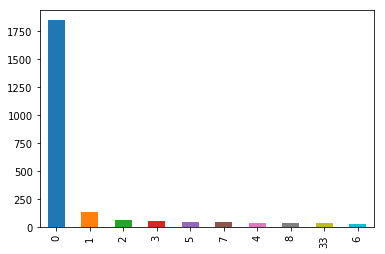

In [9]:
n_age = dataset['user_age'].value_counts()
n_age.nlargest(10).plot(kind='bar')

KeyboardInterrupt: 

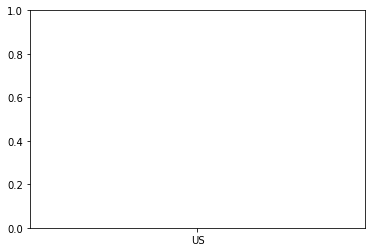

In [19]:
import seaborn as sns

#dataset['user_age'].describe()

plt.hist(data['country'])

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [50]:
X = dataset.copy()
X_small = X[['label', 'country', 'channels']]
X_small2 = X[['label', 'channels']]
y2 = X_small2.pop('label')

rus=RandomUnderSampler(random_state=0)

X_dumm = pd.get_dummies(X_small)
X_res, y_res = rus.fit_sample(X_small2, y2)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)
type(X_test)
X_test

array([[ 8],
       [ 0],
       [ 0],
       [ 5],
       [11],
       [ 0],
       [ 0],
       [ 0],
       [11],
       [ 8],
       [ 5],
       [13],
       [ 0],
       [ 0],
       [ 0],
       [ 5],
       [ 5],
       [ 6],
       [ 0],
       [ 0],
       [ 6],
       [ 5],
       [ 5],
       [11],
       [11],
       [11],
       [ 6],
       [ 6],
       [11],
       [ 0],
       [11],
       [11],
       [ 0],
       [ 8],
       [ 0],
       [ 8],
       [ 0],
       [11],
       [13],
       [ 0],
       [ 8],
       [ 6],
       [ 8],
       [ 5],
       [ 0],
       [ 6],
       [ 4],
       [ 8],
       [ 0],
       [ 8],
       [ 8],
       [ 8],
       [ 0],
       [11],
       [13],
       [ 8],
       [ 0],
       [ 5],
       [ 0],
       [ 8],
       [ 0],
       [ 5],
       [ 0],
       [ 8],
       [ 8],
       [ 0],
       [ 8],
       [11],
       [ 0],
       [ 6],
       [11],
       [ 0],
       [11],
       [11],
       [ 5],
       [11],
       [ 5],

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty='l2')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_train)
y_proba = log_reg.predict_proba(X_train)
print(y_proba)



[[0.48347184 0.51652816]
 [0.52031992 0.47968008]
 [0.69394559 0.30605441]
 ...
 [0.69394559 0.30605441]
 [0.72433984 0.27566016]
 [0.59296759 0.40703241]]


In [53]:
score = log_reg.score(X_train, y_train)
print('score: {}'.format(score))

score: 0.6356589147286822


In [54]:
from sklearn.externals import joblib
joblib.dump(log_reg, 'Model1.pkl')

['Model1.pkl']

In [43]:
X_train

array([[ 8,  0,  0, ...,  0,  0,  0],
       [ 8,  0,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [10,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [56]:
import json

with open('example_request_data.json') as f:
    example_params = json.load(f)

In [62]:
string_cols = ['sample_uuid']
int_cols = ['channels']

test = dict((k, example_params[k]) for k in ('sample_uuid', 'channels'))

In [63]:
test

{'channels': 11, 'sample_uuid': '78253fcf-4f53-4c53-8c02-e8917f47bb75'}

In [67]:
model_input = pd.DataFrame(test, index=[0])

In [68]:
model_input

,channels,sample_uuid
0,11,78253fcf-4f53-4c53-8c02-e8917f47bb75


In [75]:
test2 = model_input[['channels']]

In [78]:
test2

,channels
0,11


In [83]:
log_reg.predict(test2)[0]

0.0

In [85]:
log_reg.predict_proba(test2)[0][0]

0.6939455870800667

In [81]:
X_train

array([[ 6],
       [ 5],
       [11],
       ...,
       [ 0],
       [11],
       [ 0]])

In [77]:
log_reg.predict_proba(test2)

array([[0.69394559, 0.30605441]])